# Simple Summarization Using Stuff Method

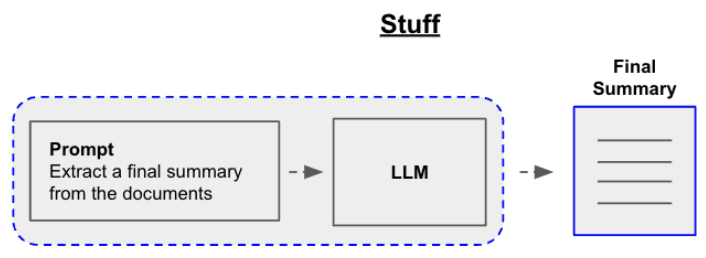 

We suppose that we have a set of documents and we want to summarize the content. LLMs are great tool for this given their proficiency in understanding and synthesizing text.

In this notebook, we'll use a simplested method called stuff, which exports all documents as a single prompt to LLMs.

In [6]:
# First load document use into 2 methods
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://huyenchip.com/2023/04/11/llm-engineering.html")
docs = loader.load()

In [7]:
# Easy method, it is available for the both by using 'load_summarize_chain' function 
from langchain.chains.summarize import load_summarize_chain
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-1106")
# We can also supply chain_type="map_reduce" or chain_type="refine".
chain = load_summarize_chain(llm, chain_type="stuff")

chain.run(docs)

'In this blog post, Chip Huyen discusses the challenges of building large language model (LLM) applications for production. She covers the key challenges of productionizing LLM applications, task composability, and promising use cases. The challenges include the ambiguity of natural languages, cost and latency, prompt engineering, and backward and forward compatibility. The blog also explores the use cases of LLM applications, such as AI assistants, chatbots, programming and gaming, learning, talk-to-your-data, search and recommendation, sales, and SEO. Huyen also shares strategies for keeping up to date with the field of LLM applications.'

In [8]:
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain_core.prompts import PromptTemplate
from langchain.chains.llm import LLMChain

# Define prompt
prompt_template = """Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:"""
prompt = PromptTemplate.from_template(prompt_template)

# Define LLM chain
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-16k")
llm_chain = LLMChain(llm=llm, prompt=prompt)

# Define StuffDocumentsChain
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

print(stuff_chain.run(docs))

In this blog post, the author discusses the challenges of building large language model (LLM) applications for production. They highlight the difficulty of making LLM applications production-ready and the limitations of LLMs due to the ambiguous nature of natural languages. The post is divided into three parts: discussing the challenges of productionizing prompt engineering, exploring task composability and control flows, and highlighting promising use cases for LLM applications such as AI assistants, chatbots, programming and gaming, learning, talk-to-your-data, search and recommendation, sales, and SEO. The author concludes by acknowledging the rapid evolution of LLM applications and the need to stay updated with the latest tools and developments in the field.
